# SPICED Academy ///  Project Week 03 /// Time Features and Linear Regresssion

***

## I. Define goal

The goal of this project is to predict the `count` of shared bikes depending on time and weather data. To ensure that there is no data leakage, the two columns `casual` and `registered` are removed from the data set, as their sum is equal to the total count. 

The applied method is a machine learning model using Linear Regression that predicts the bike sharing demand (`count`).


___

## II. Import libraries and get data

In [1]:
#data processing
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#machine learning models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

#hyperparameter optimization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

#regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#cross-validation
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import (KFold, ShuffleSplit, StratifiedKFold)

In [2]:
#open relevant files
bike = pd.read_csv('train.csv', sep = ',')

***

## III. Preparing and splitting the data in train and test data

In [3]:
#exploring the data
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
#making sure that datetime is dtype="datetime64"
bike['datetime'] = pd.to_datetime(bike['datetime'])

In [5]:
#extracting information from the time objects and creating new columns for further exploration
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike = bike[['datetime','year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [6]:
#exploring the data types in general
bike.dtypes

datetime      datetime64[ns]
year                   int64
month                  int64
day                    int64
hour                   int64
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
#setting datetime as index
bike.set_index('datetime', inplace = True)

***

*Removing the potential data leackages from the dataset*

In [8]:
#removing the columns 'casual' and 'registered' (keyword: data leackage) 
bike = bike.drop(['casual', 'registered'], axis = 1)

In [9]:
#checking if the respective columns were deleted from the train and test dataset 
bike.head()

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0,1


****

*Removing outliers (information was retrieved from EDA further down)*

In [10]:
#removing the outliers in the weather and windspeed columns
bike['weather'] = bike['weather'].replace([4],3)
bike = bike[bike['windspeed'] < 50]  

#checking if the removel worked
bike['weather'].unique()

array([1, 2, 3])

***

*Splitting the data*

In [11]:
#splitting the data
X = bike
y = bike['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [12]:
#checking if the splitting worked
X_val.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2011-11-11 06:00:00 to 2011-03-05 22:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2177 non-null   int64  
 1   month       2177 non-null   int64  
 2   day         2177 non-null   int64  
 3   hour        2177 non-null   int64  
 4   season      2177 non-null   int64  
 5   holiday     2177 non-null   int64  
 6   workingday  2177 non-null   int64  
 7   weather     2177 non-null   int64  
 8   temp        2177 non-null   float64
 9   atemp       2177 non-null   float64
 10  humidity    2177 non-null   int64  
 11  windspeed   2177 non-null   float64
 12  count       2177 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 238.1 KB


In [13]:
#checking if the splitting worked
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6528 entries, 2012-09-14 23:00:00 to 2011-07-03 04:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        6528 non-null   int64  
 1   month       6528 non-null   int64  
 2   day         6528 non-null   int64  
 3   hour        6528 non-null   int64  
 4   season      6528 non-null   int64  
 5   holiday     6528 non-null   int64  
 6   workingday  6528 non-null   int64  
 7   weather     6528 non-null   int64  
 8   temp        6528 non-null   float64
 9   atemp       6528 non-null   float64
 10  humidity    6528 non-null   int64  
 11  windspeed   6528 non-null   float64
 12  count       6528 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 714.0 KB


***

## IV. Exploring the train data set

### *IV.I.Meaning of variables*

<ins>datetime:</ins> hourly date + timestamp  
<br>
<ins>season:</ins> 1 = spring, 2 = summer, 3 = fall, 4 = winter 
<br>
<ins>workingday:</ins> whether the day is neither a weekend nor holiday
<br>
<ins>weather:</ins> 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
<br>
<ins>temp:</ins> temperature in Celsius
<br>
<ins>atemp:</ins> "feels like" temperature in Celsius
<br>
<ins>humidity:</ins> relative humidity
<br>
<ins>windspeed:</ins> wind speed
<br>
<ins>casual:</ins> number of non-registered user rentals initiated
<br>
<br>
<ins>registered:</ins> relative humidity - <font color='blue'>excluded</font> 
<br>
<ins>windspeed:</ins> number of registered user rentals initiated - <font color='blue'>excluded</font> 
<br>
<ins>count:</ins> number of total rentals - <font color='blue'>y</font> 


***

### *IV.II. Descriptive statistics*

In [14]:
bike.describe()

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000
mean,2011.502114,6.522239,9.992557,11.541169,2.506800,0.028579,0.681033,1.418122,20.229480,23.653824,61.894872,12.784251,191.578846
std,0.500019,3.444455,5.475903,6.915816,1.116173,0.166629,0.466098,0.633265,7.790759,8.473455,19.241804,8.127514,181.161756
min,2011.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,5.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,42.000000
50%,2012.000000,7.000000,10.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,2012.000000,10.000000,15.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,284.000000
max,2012.000000,12.000000,19.000000,23.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,47.998800,977.000000


*Pearson´s correlation*

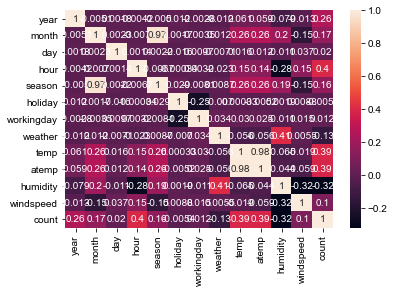

In [15]:
sns.heatmap(bike.corr(), annot=True)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Pearson´s correlation: </font><br>`Hour`, `temp`, `atemp` (x) seem to have the highest correlation with `count` (y).<br> For this dataframe, it was decided to drop `season` and `atemp`, as season is highly correlated to `month` (0.97) , and `atemp` is highly correlated to `temp` (0.98). `atemp` and `temp` have the same correlation with `count` (0.39), so one of them was dropped.

***

#### <font color='blue'>*TIME RELATED DATA*</font>

*Differences between years*

In [16]:
#grouping by the year 
bike.groupby('year')['count'].mean()

year
2011    144.197859
2012    238.560944
Name: count, dtype: float64

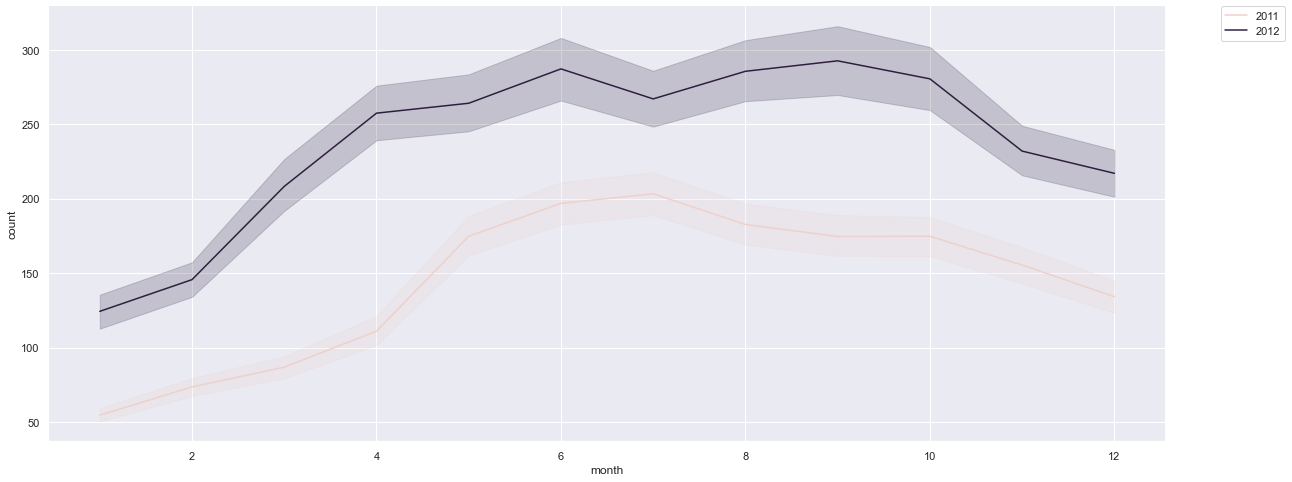

In [17]:
#plotting the count of shared bikes over the months, grouped by year
sns.lineplot(data=bike, x="month", y="count", hue="year")
sns.set_theme(style="whitegrid", palette = "Set2")
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Years: </font> The count of shared bikes was higher in 2012 compared to 2011

***

*Differences between months*

In [18]:
#grouping by the month 
bike.groupby('month')['count'].mean()

month
1      90.366516
2     110.052280
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.250549
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

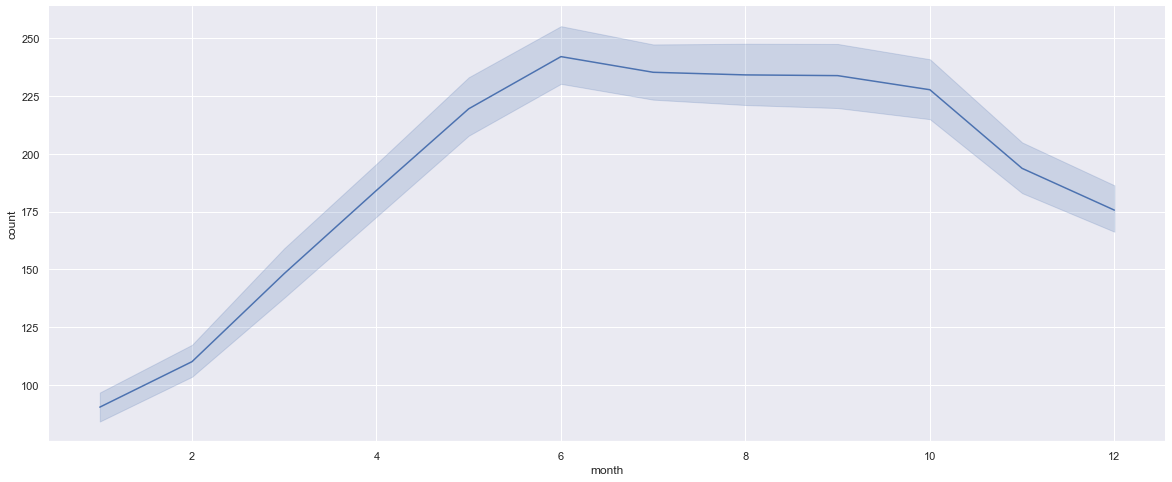

In [19]:
#plotting the count of shared bikes over the months
sns.lineplot(data=bike, x="month", y="count")
sns.set_theme(style="whitegrid", palette = "Set2")
sns.despine(left=True)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Months: </font> The count of shared bikes is higher during the warmer months (not surprising)

***

*Differences between hours*

In [20]:
#grouping by the hour
bike.groupby('hour')['count'].mean()

hour
0      55.138462
1      33.922737
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.481319
16    316.372807
17    469.008791
18    431.408791
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

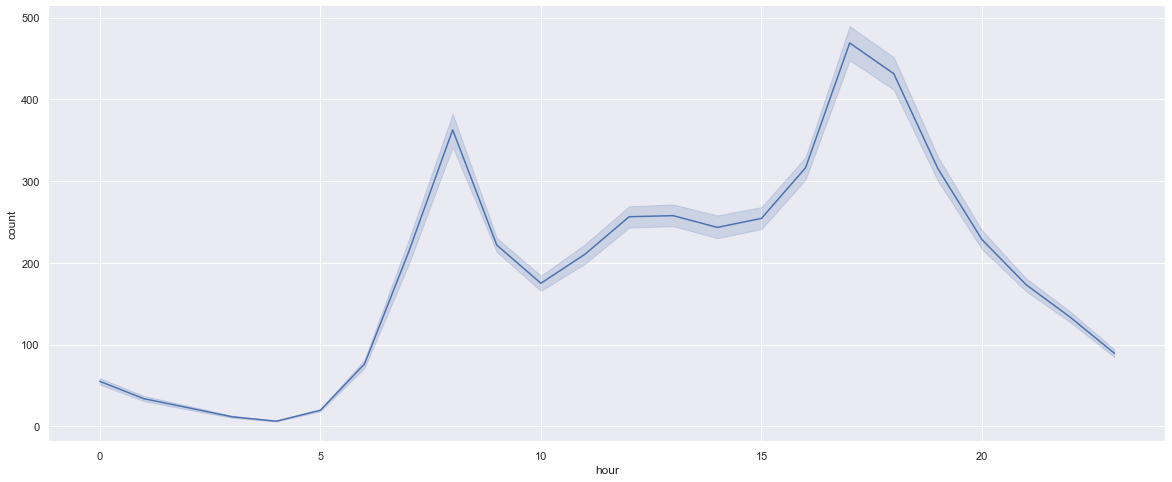

In [21]:
#plotting the count of shared bikes over the hours
sns.lineplot(data=bike, x="hour", y="count")
sns.set_theme(style="whitegrid", palette = "Set2")
sns.despine(left=True)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Hours: </font>  The count of shared bikes is higher during rush hours (morning and late evening)

***

#### <font color='blue'>*WEATHER RELATED DATA*</font>

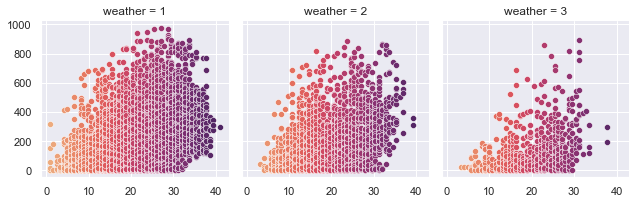

In [22]:
#inserting a facet grid to examine the weather data (just for fun)
g = sns.FacetGrid(bike, col="weather", hue = "temp", palette = "flare")
g.map_dataframe(sns.scatterplot, x="temp", y="count")

<font color='blue'>Weather: </font>removing the weather = 4 datapoint as it seems to be an outlier; nice weather (weather = 1) and moderately warm temperatures (between circa 25 and 35 degrees) result in the highest count of shared bikes (unsurprisingly)

***

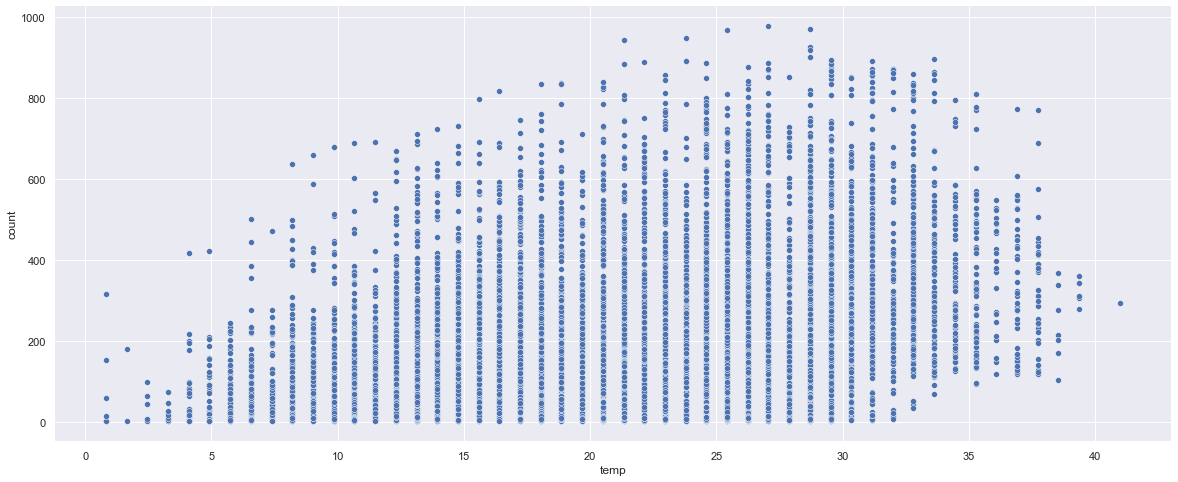

In [23]:
#exploring the temp data to potentially catch more potential outliers
sns.scatterplot(data=bike, x="temp", y="count")
sns.set_theme(style="whitegrid", palette = "Set2")
sns.despine(left=True)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Temp: </font>Moderately warm temperatures (between circa 25 and 35 degrees) result in the highest count of shared bikes (unsurprisingly)

***

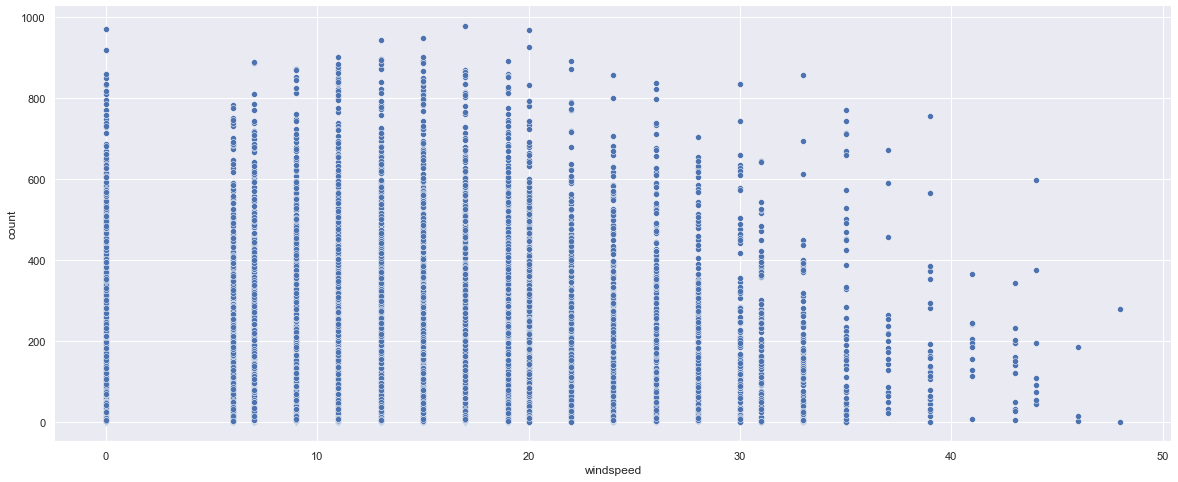

In [24]:
#exploring the windspeed data to potentially catch more potential outliers
sns.scatterplot(data=bike, x="windspeed", y="count")
sns.set_theme(style="whitegrid", palette = "Set2")
sns.despine(left=True)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Windspeed: </font>removing the windspeed > 50 datapoints (count = 3) as they seem to be outliers

***

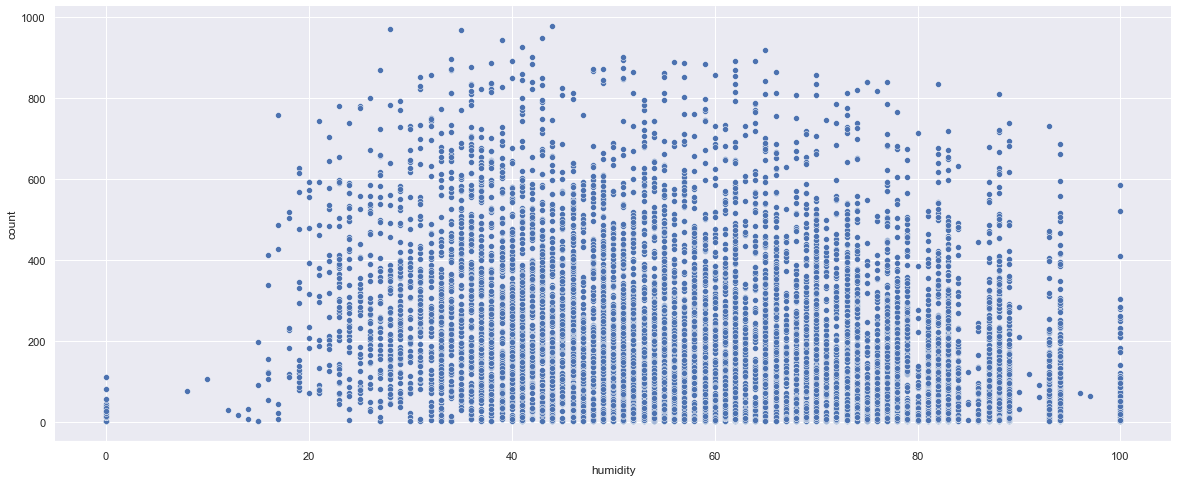

In [25]:
#exploring the humidity data to potentially catch more potential outliers
sns.scatterplot(data=bike, x="humidity", y="count")
sns.set_theme(style="whitegrid", palette = "Set2")
sns.despine(left=True)
sns.set(rc = {'figure.figsize':(20,8)})

<font color='blue'>Humidity: </font>does not have to seem a high impact on bike sharing

***

### <font color='blue'>SUMMARY: EXPLORATORY DATA ANALYSIS
<br> <font color='blue'>Correlation:</font> Hour, temp, atemp (x) seem to have the highest correlation with count (y)<br><font color='blue'>Time-related data:</font> There was a higher count of shared bikes in 2012 compared to 2011; warmer months result in higher count of shared bikes; rush hours (morning and late afternoons) also result in higher count of shared bikes <br><font color='blue'>Weather-related data:</font> There seems to be an outlier in 'weather' (weather = 4) and two outliers in windspeed (windspeed >55); nice weather (weather = 1) and moderately warm temperatures (between circa 25 and 35 degrees) result in the highest count of shared bikes (unsurprisingly)

***

## V. Feature Engineering

*Removing the potential data leackages and y from train and test data*

In [26]:
#removing the column 'count' (y) from the train, val and test dataset 
X_train = X_train.drop(['count'], axis = 1)
X_val = X_val.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)

In [27]:
#removing the column 'season' and 'atemp' from the train, val and test dataset 
X_train = X_train.drop(['season', 'atemp'], axis = 1)
X_val = X_val.drop(['season', 'atemp'], axis = 1)
X_test = X_test.drop(['season', 'atemp'], axis = 1)

In [28]:
#checking if y true was deleted from the train and test dataset 
X_train.head()

,year,month,day,hour,holiday,workingday,weather,temp,humidity,windspeed
datetime,,,,,,,,,,
2012-09-14 23:00:00,2012,9,14,23,0,1,1,25.42,78,6.0032
2011-01-17 20:00:00,2011,1,17,20,1,0,3,6.56,80,12.9980
2011-01-16 05:00:00,2011,1,16,5,0,0,2,10.66,56,11.0014
2012-03-15 22:00:00,2012,3,15,22,0,1,1,21.32,68,8.9981
2012-09-05 12:00:00,2012,9,5,12,0,1,1,31.98,70,7.0015


***

*Discover and replace missing values for the train and test datasets*

In [29]:
#checking if there are any missing values
X_train.isna().sum()

year          0
month         0
day           0
hour          0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
dtype: int64

***

*Transforming the numerical and categorical columns*

In [30]:
#seperating the numerical and categorical columns 
numerical_columns = ['temp', 'humidity', 'windspeed']
categorical_columns = ['weather', 'year', 'month', 'day', 'hour', 'holiday', 'workingday']

In [31]:
#defining the transformer and its parameters
column_transformer = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [32]:
#fitting the columns to the transforming method
column_transformer.fit(X_train) # DO NOT FIT ON VAL AND TEST DATA

ColumnTransformer(transformers=[('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['weather', 'year', 'month', 'day', 'hour',
                                  'holiday', 'workingday']),
                                ('num_scaler', MinMaxScaler(),
                                 ['temp', 'humidity', 'windspeed'])])

In [33]:
#transforming the columns
X_train = column_transformer.transform(X_train)
X_val = column_transformer.transform(X_val) 
X_test = column_transformer.transform(X_test) 

***

*Applying a polynomial transformation on the whole dataset*

In [34]:
#defining the polynomial transformation 
poly = PolynomialFeatures(degree=2)

In [35]:
#fitting the columns to the transforming method
X_train = poly.fit_transform(X_train)# DO NOT FIT ON VAL AND TEST DATA

In [36]:
#transforming the columns
X_val = poly.transform(X_val) 
X_test = poly.transform(X_test) 

***

## VI. Train model

*Applying a linear regression model*

In [37]:
#applying a linear regression model 
m = LinearRegression(fit_intercept = True, normalize = False) 

#hyperparameters were obtained from the GridSearch further down in the notebook, 
#unfortunately, they did not improve the scoring of the model

In [38]:
#train the model 
m.fit(X_train, y_train)

LinearRegression()

In [39]:
#calculating the score for the train data set
round(m.score(X_train, y_train),2) #> R^2 score

0.94

In [40]:
#calculating the score for the test data set
round(m.score(X_val, y_val),2)

0.91

In [41]:
#calculating y pred
y_pred = m.predict(X_val)

In [42]:
#checking the intercept
m.intercept_

-784056497919760.4

***

*Checking out various loss function metrics (just for fun)*

In [43]:
#mae
round(mean_absolute_error(y_val, y_pred),2)

38.57

In [44]:
#mse
round(mean_squared_error(y_val, y_pred),2)

2883.37

In [45]:
#rmse
round(mean_squared_error(y_val, y_pred, squared=False),2)

53.7

In [46]:
#rmsle log
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

m.fit(X_train, y_train_log)

y_pred_log = m.predict(X_val)
y_pred = np.expm1(y_pred_log)

round(np.sqrt(mean_squared_log_error(y_val, y_pred)),2)

0.33

In [47]:
#comparing the four loss function metrics
loss_func = pd.DataFrame({'Loss Function Metrics' : ['MAE', '///','MSE', 'RMSE', 'RMSLE'],'Score' : ['38.57', '///','2883.37', '53.7', '0.33']})
loss_func.style.hide_index()

Loss Function Metrics,Score
MAE,38.57
///,///
MSE,2883.37
RMSE,53.7
RMSLE,0.33


### <font color='blue'>SUMMARY: LINEAR REGRESSION MACHINE LEARNING MODEL </font>
<br> Generally, the Linear Regression Machine learning model seems to perform pretty well. The variance between the train (0.94) and test (0.91) data set is very low, and the RMSLE is extremely low (0.33). 

***

## VI. Hyperparameter Optimization & Regularization

*Applying GridSearch for Hyperparameter Optimization*

In [48]:
#defining the model, linear regression optimal 
estimator = LinearRegression()
estimator.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [49]:
#defining the parameters 
parameters = {"fit_intercept": [True, False],
             "normalize": [True, False],
             }

In [50]:
#Defining the model 
g = GridSearchCV(estimator = estimator, param_grid = parameters, cv=10)

In [51]:
#fiting the model on my train data set
g.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [52]:
#getting the best parameters
g.best_params_

{'fit_intercept': False, 'normalize': True}

<font color='blue'>Hyperparameter Optimization: </font>for the estimator `LinearRegression()`the following hyperparameters are the most fitting: `'fit_intercept': True, 'normalize': False`. Unfortunately, inserting these hyperparameters into the machine learning model (see above) did not improve the model scores of neither the training nor the validation dataset. 

***

## VII. CROSS-VALIDATION

In [53]:
#defining the cross-validation model
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [54]:
#inserting the values
cross_val = cross_val_score(m, X_train, y_train, cv=kf)

In [55]:
#examing the five different scores of the  training data 
cross_val

array([0.89948774, 0.88120117, 0.8950113 , 0.89866885, 0.90118914])

In [56]:
#getting the overal mean of the cross-validation
cross_val.mean()

0.8951116403090091

In [57]:
#getting the overal standard variation of the cross-validation
cross_val.std()

0.007242253330629337

In [58]:
#creating a dataframe to have a better depiction of the mean and standard deviation 
cross_val = pd.DataFrame({'Cross Val' : ['Mean', 'Standard Deviation'],'Score' : ['0.90', '0.01']})
cross_val.style.hide_index()

Cross Val,Score
Mean,0.90
Standard Deviation,0.01


<font color='blue'>Cross-Validation: </font>it seems like the cross-validation yielded the same results for ten folds, the overal mean is 0.90 and the standard deviation is very low with +- 0.01

***

## VIII. COMPARING TRAIN, VALIDATION AND TEST DATA SET

*Calculating the model scores for all data sets*

In [59]:
#calculating the model score using the log of y_train
round(m.score(X_train, y_train_log),2)

0.97

In [60]:
#calculating the model score using the log of y_val
round(m.score(X_train, y_val_log),2)

0.97

In [61]:
#calculating the model score using the log of y_test
round(m.score(X_test, y_test_log),2)

0.94

***

*Calculating the RMSLE for all data sets*

In [62]:
#RMSLE for the train data set
y_pred_log = m.predict(X_train)
y_pred = np.expm1(y_pred_log)

round(np.sqrt(mean_squared_log_error(y_train, y_pred)),2)

0.25

In [63]:
#RMSLE for the validation data set
y_pred_log = m.predict(X_val)
y_pred = np.expm1(y_pred_log)

round(np.sqrt(mean_squared_log_error(y_val, y_pred)),2)

0.33

In [64]:
#RMSLE for the test data set
y_pred_log = m.predict(X_test)
y_pred = np.expm1(y_pred_log)

round(np.sqrt(mean_squared_log_error(y_test, y_pred)),2)

0.34

***

*Comparing the different model scores and metric values*

In [65]:
#comparing the three differnt scores: train, val and test
models_score = pd.DataFrame({'Data Set' : ['Training Data', 'Validation Data', 'Test Data'],'Model Score' : ['0.97', '0.97', '0.94'], 'RMSLE' : ['0.25', '0.33', '0.34']})
models_score.style.hide_index()

Data Set,Model Score,RMSLE
Training Data,0.97,0.25
Validation Data,0.97,0.33
Test Data,0.94,0.34


<font color='blue'>Comparison: </font>The training, validation and test scores are all very similiar, meaning that the linear regression model seems to be robust regarding unseen data. 

***

## IX. FINAL STEP: DEPLOY AND MONITOR

///

***

## <font color='blue'>*Extra: Applying various machine learning models (just for fun)*</font>

*Stochastic Gradient Descent (SGD)*

In [66]:
#applying the model
sgd = linear_model.SGDRegressor(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

sgd_score_train = sgd.score(X_train, y_train)
sgd_score_val = sgd.score(X_val, y_val)
sgd_score_test = sgd.score(X_test, y_test)

Y_pred = sgd.predict(X_val)

In [67]:
#checking out the sgd scores for the train, validation and test data sets
round(sgd_score_train,2), round(sgd_score_val,2), round(sgd_score_test,2)

(0.85, 0.84, 0.84)

***

*Decision Tree*

In [68]:
#applying the model
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, y_train)  

decision_tree_score_train = decision_tree.score(X_train, y_train)
decision_tree_score_val = decision_tree.score(X_val, y_val)
decision_tree_score_test = decision_tree.score(X_test, y_test)

y_pred = decision_tree.predict(X_val)  

In [69]:
#checking out the Decision Tree model scores for the train, validation and test data sets
round(decision_tree_score_train,2), round(decision_tree_score_val,2), round(decision_tree_score_test,2)

(1.0, 0.82, 0.8)

***

*Random Forest*

In [70]:
#applying the model
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

random_forest_score_train = random_forest.score(X_train, y_train)
random_forest_score_val = random_forest.score(X_val, y_val)
random_forest_score_test = random_forest.score(X_test, y_test)

y_pred = random_forest.predict(X_val)

In [71]:
#checking out the random forest model scores for the train, validation and test data sets
round(random_forest_score_train,2), round(random_forest_score_val,2), round(random_forest_score_test,2)

(0.99, 0.91, 0.9)

***

*KNN nearest neigbors*

In [72]:
#applying the model
knn = KNeighborsRegressor(n_neighbors = 3) 
knn.fit(X_train, y_train)

knn_score_train = knn.score(X_train, y_train)
knn_score_val = knn.score(X_val, y_val)
knn_score_test = knn.score(X_test, y_test)

y_pred = knn.predict(X_val)  

In [73]:
#checking out the KNN nearest neigbors model scores for the train, validation and test data sets
round(knn_score_train,2), round(knn_score_val,2), round(knn_score_test,2)

(0.75, 0.53, 0.55)

***

*Gaussian Naive Bayes*

In [74]:
#applying the model
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

gaussian_score_train = gaussian.score(X_train, y_train)
gaussian_score_val = gaussian.score(X_val, y_val)
gaussian_score_test = gaussian.score(X_test, y_test)

y_pred = gaussian.predict(X_val)  

In [75]:
#checking out the Gaussian Naive Bayes model scores for the train, validation and test data sets
round(gaussian_score_train,2), round(gaussian_score_val,2), round(gaussian_score_test,2)

(0.96, 0.01, 0.02)

***

*Linear Support Vector Machine*

In [76]:
#applying the model
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

linear_svc_score_train = linear_svc.score(X_train, y_train)
linear_svc_score_val = linear_svc.score(X_val, y_val)
linear_svc_score_test = linear_svc.score(X_test, y_test)

y_pred = linear_svc.predict(X_val)  

/Users/margithain/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [77]:
#checking out the Linear Support Vector Machine model scores for the train, validation and test data sets
round(linear_svc_score_train,2), round(linear_svc_score_val,2), round(linear_svc_score_test,2)

(1.0, 0.02, 0.02)

***

*Comparing the various machine learning models*

In [78]:
#creating a ranking of the various machine learning models, sorted by Training Score
results = pd.DataFrame({'Machine Learning Model': ['Linear Regression', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Linear SVM'],'Train Score': [0.97, 0.85, 1.0, 0.99, 0.75, 0.96, 1.0 ], 'Validation Score': [0.97, 0.84, 0.82, 0.91, 0.53, 0.01, 0.02], 'Test Score': [0.94, 0.83, 0.81, 0.9, 0.55, 0.02, 0.02]})
result_df = results.sort_values(by='Validation Score', ascending=False)
result_df = result_df.set_index('Machine Learning Model')
result_df.head(9)

,Train Score,Validation Score,Test Score
Machine Learning Model,,,
Linear Regression,0.97,0.97,0.94
Random Forest,0.99,0.91,0.90
Stochastic Gradient Decent,0.85,0.84,0.83
Decision Tree,1.00,0.82,0.81
KNN,0.75,0.53,0.55
Linear SVM,1.00,0.02,0.02
Naive Bayes,0.96,0.01,0.02


***